# Diabetes Prediction

Its a chronic disease when the pancreas cant create insulin on its own. Its the fastest growind disease in australia,contributes to one in ten deaths in australia. Hence predicting and detecting is the first step to preventing and managing the disease. Furthermore 90% of type 2 Diabetes cases can be avoided if there is a change food habbits and unhealthy lifestyle. The objective of this study is to build a model to predict whether an individual is at risk of diabetes or not.



## Data Description :-

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree functionr
* Age: Age (years)
* Cabin : Cabin Number
* Outcome: Class variable (0 or 1)

## 1. Libraries
   Its a good coding practice to keep all the libraries in the and commenting what each library does.

In [5]:
#loading Libraries to perform EDA
import numpy as np    #linear Algebbra
import pandas as pd   # data processing
import seaborn as sns   # visualisations
import matplotlib.pyplot as plt # visualisations
import warnings #avoid warning flash
from sklearn.metrics import accuracy_score,confusion_matrix
warnings.filterwarnings('ignore')

## 2. Loading the Data set

In [6]:
#loading the input data as below
Diabetes = pd.read_csv(r'/Users/akshay/Desktop/archive (2)/diabetes.csv')


## 3. Exploratory Data Analysis

   Exploratory Data analysis




* Head of the Data set
* General info about the data set
* Types of columns
* Descriptive statistics summary



In [7]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
Diabetes.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [9]:
Diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4. Data Cleaning
   Data Cleaning involves the following Processes:


* Dropping Duplicate Values
* Checking Null Values


In [11]:
Diabetes=Diabetes.drop_duplicates()

In [77]:
for col in Diabetes.columns:
    missing_values = np.mean(Diabetes[col].isnull())
    print('{} - {}%'.format(col, round(missing_values*100)))

Pregnancies - 0%
Glucose - 0%
BloodPressure - 0%
SkinThickness - 0%
Insulin - 0%
BMI - 0%
DiabetesPedigreeFunction - 0%
Age - 0%
Outcome - 0%


In [78]:
Diabetes[Diabetes == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## 5. Data Visualisation 
* Box Plots
* Histogram

In [79]:
Diabetes['Glucose']=Diabetes['Glucose'].replace(0,Diabetes['Glucose'].mean())
Diabetes['BloodPressure']=Diabetes['BloodPressure'].replace(0,Diabetes['BloodPressure'].mean())
Diabetes['SkinThickness']=Diabetes['SkinThickness'].replace(0,Diabetes['SkinThickness'].median())
Diabetes['Insulin']=Diabetes['Insulin'].replace(0,Diabetes['Insulin'].median())
Diabetes['BMI']=Diabetes['BMI'].replace(0,Diabetes['BMI'].median())

<AxesSubplot:xlabel='Outcome', ylabel='count'>

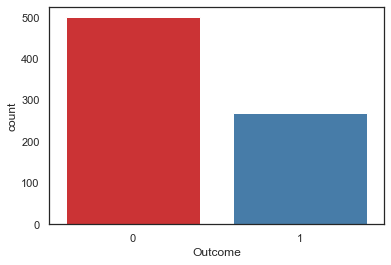

In [80]:
sns.countplot('Outcome',data=Diabetes)

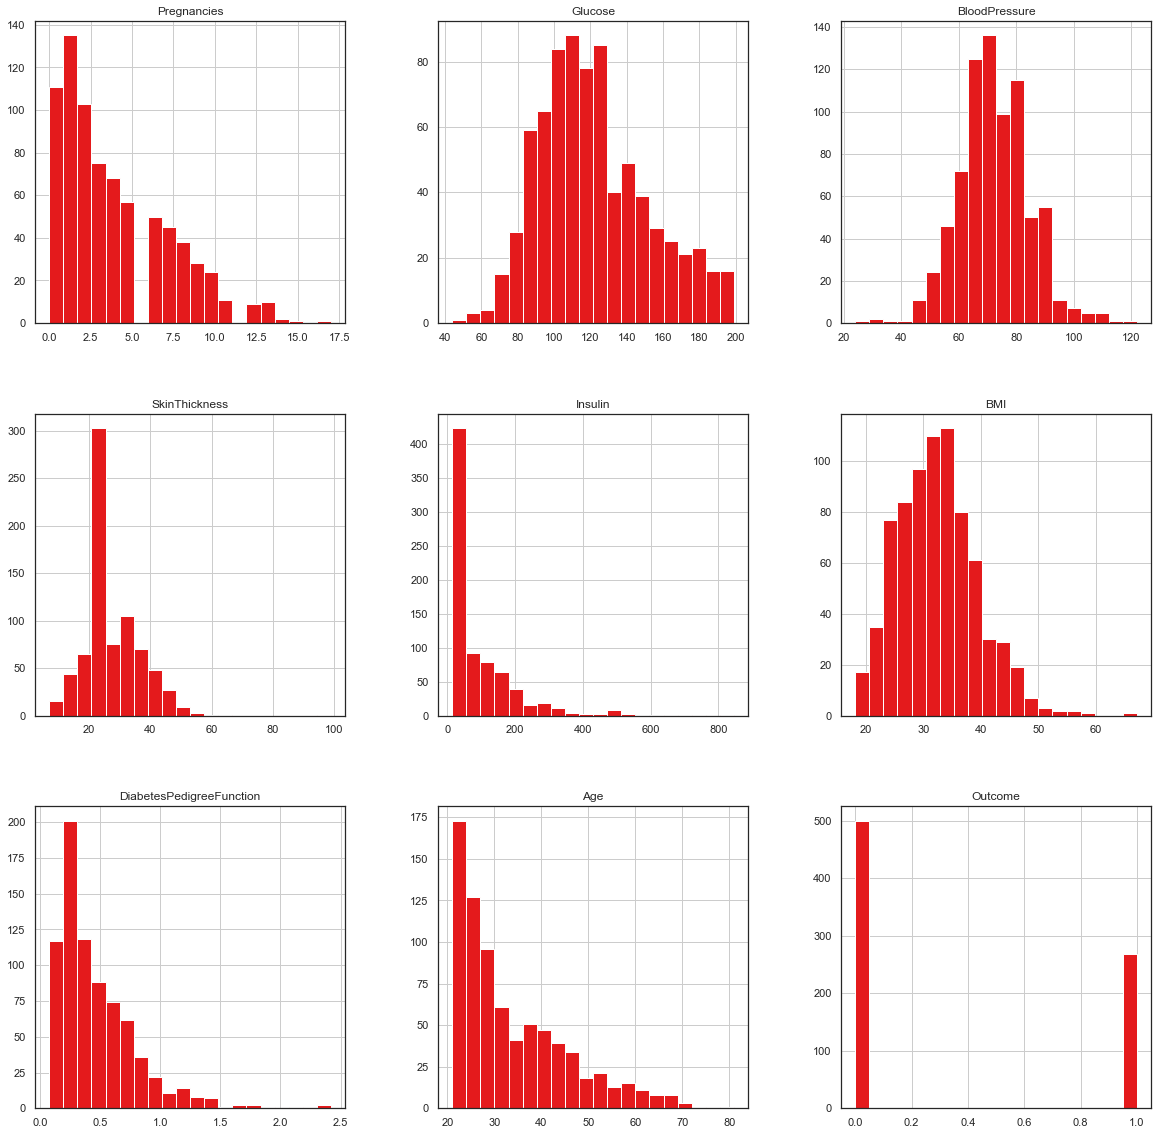

In [81]:
Diabetes.hist(bins=20,figsize=(20,20))
plt.show()


### Univariate analysis

In [82]:
def dist_box(Diabetes):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=Diabetes.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=Diabetes.mean()
    median=Diabetes.median()
    mode=Diabetes.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=Diabetes,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.set_palette(sns.color_palette("Set1", 8))
    sns.distplot(Diabetes,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

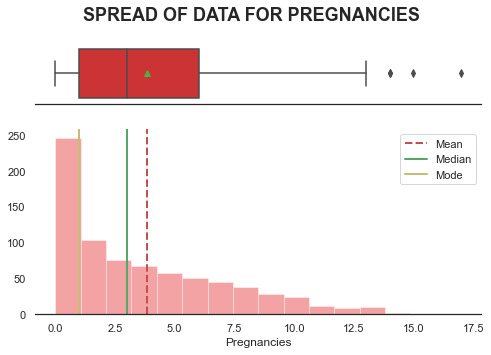

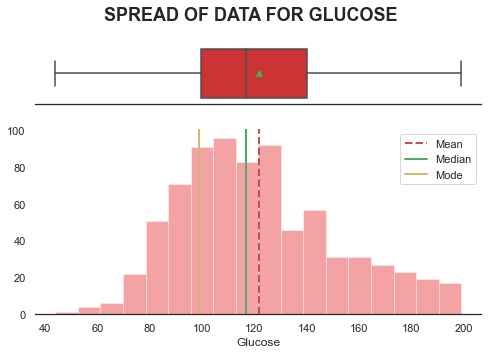

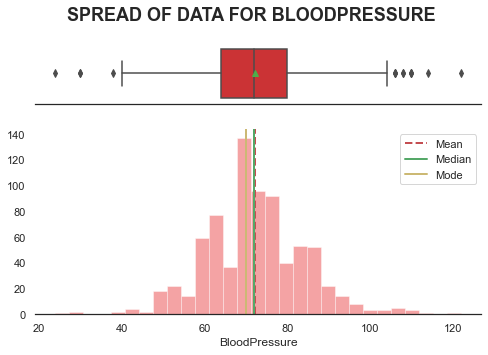

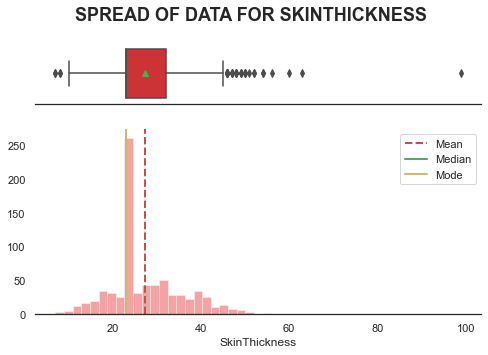

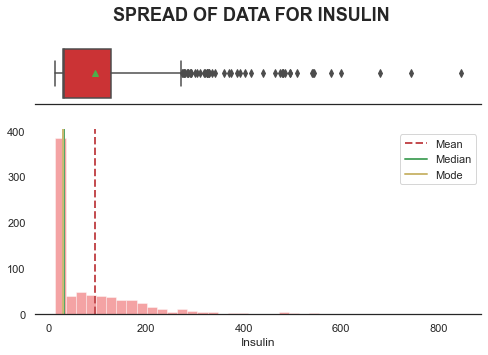

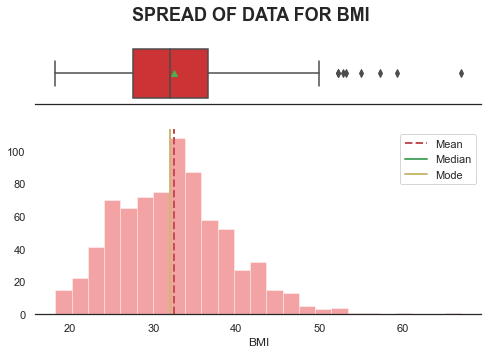

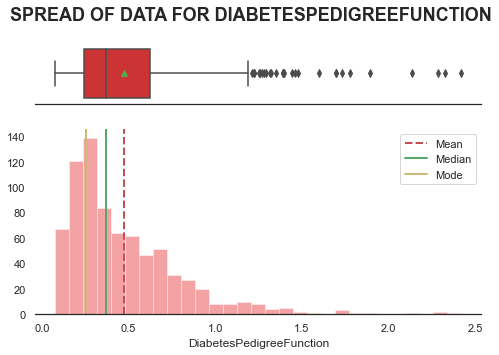

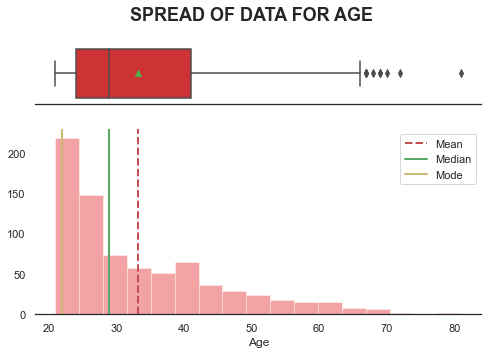

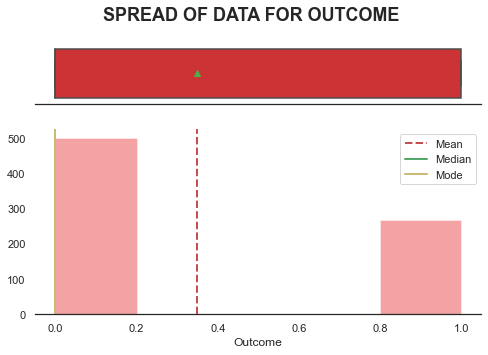

In [83]:
#select all quantitative columns for checking the spread
list_col= Diabetes.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(Diabetes[list_col[i]])

No handles with labels found to put in legend.


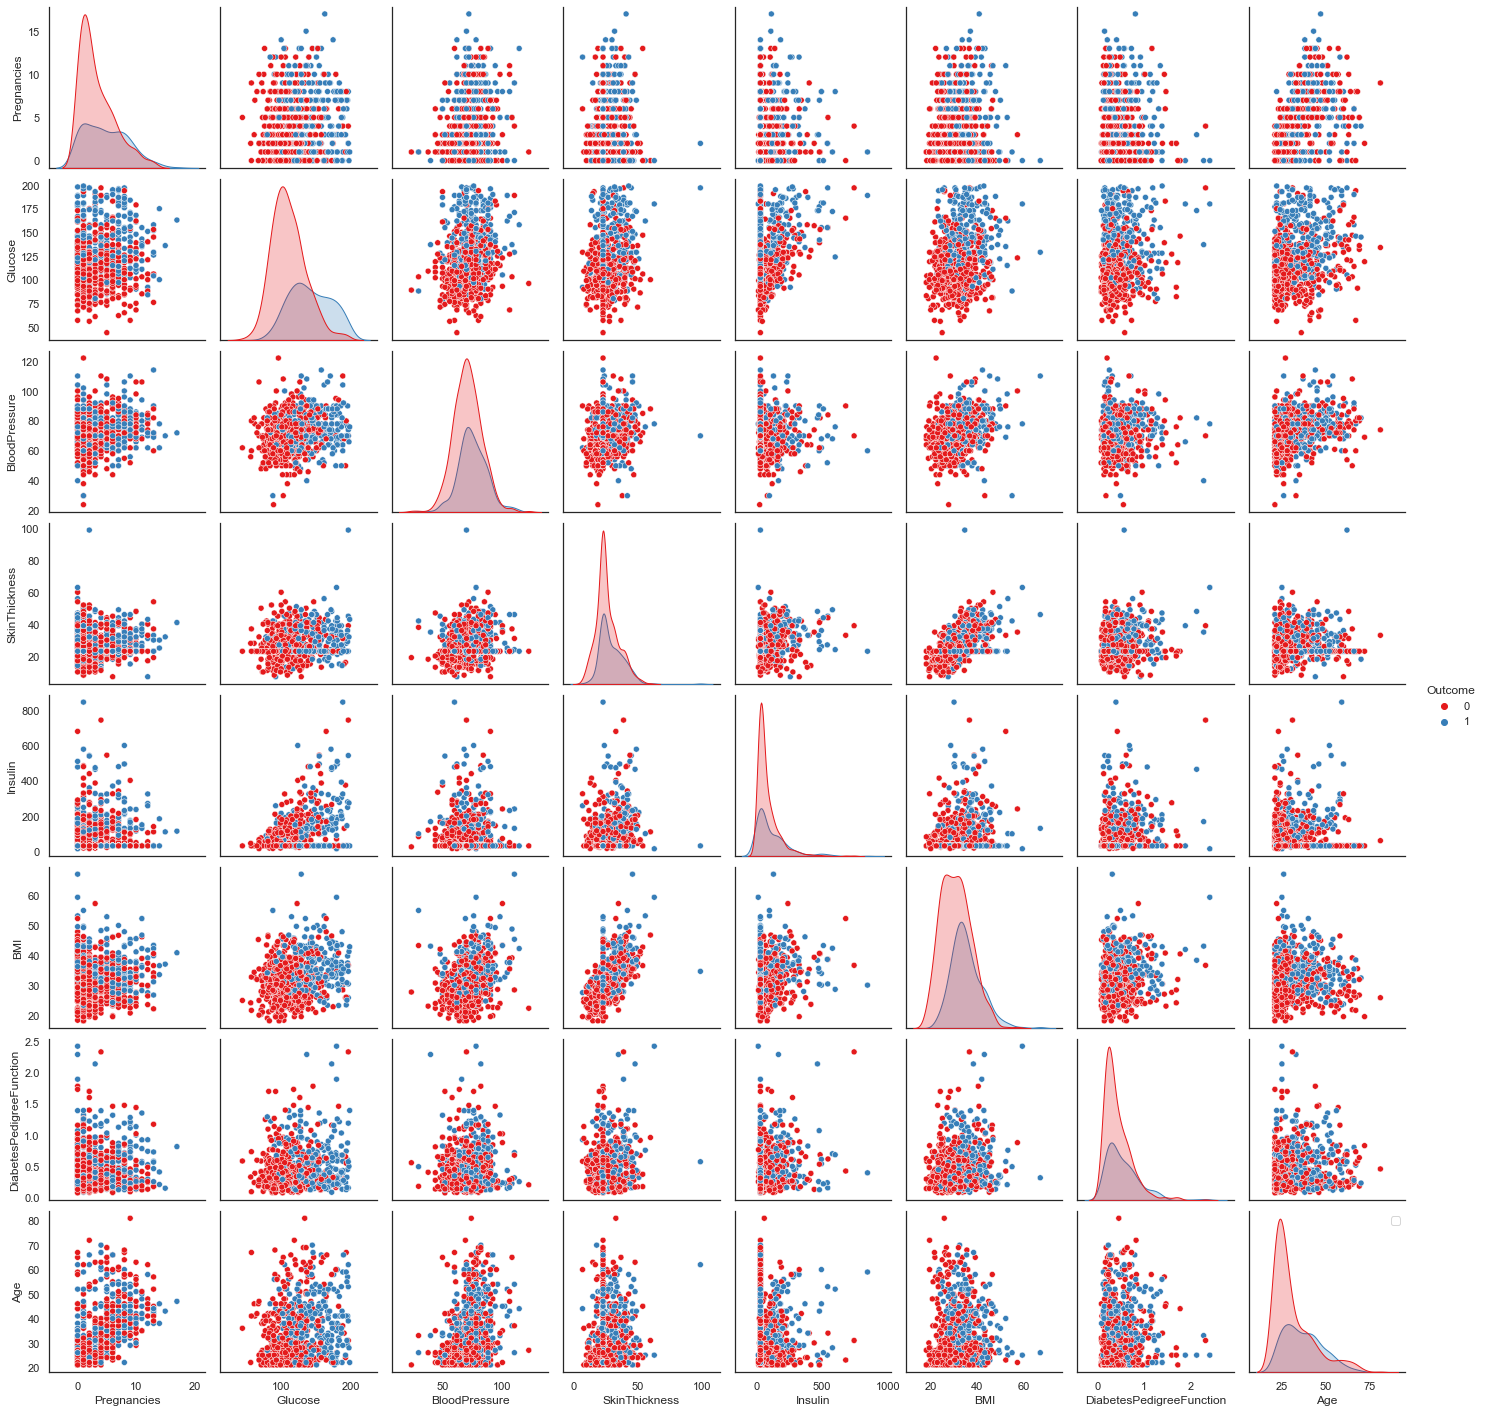

In [84]:
sns.pairplot(data=Diabetes,hue="Outcome")
plt.legend()

### Bivariate Analysis

<AxesSubplot:>

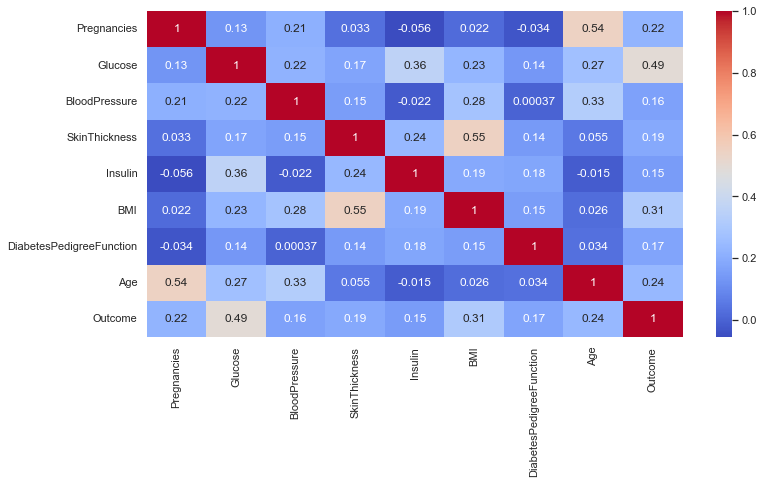

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(Diabetes.corr(),annot=True,cmap="coolwarm")

## 6. Modelling

### A. Splitting Data

In [86]:
X = Diabetes.drop('Outcome',axis=1)
y = Diabetes['Outcome'] 

In [87]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split        
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.20,random_state=0)

### B. Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,Y_train)

log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))

Train Set Accuracy:76.0586319218241
Test Set Accuracy:79.22077922077922


### C. GradientBoostingClassifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)


gbc_acc=accuracy_score(Y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,gbc.predict(X_test))*100))

Train Set Accuracy:92.50814332247556
Test Set Accuracy:81.81818181818183


### C. DecisionTreeClassifier


In [94]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

Train Set Accuracy:80.78175895765473
Test Set Accuracy:74.67532467532467


### Conclusion
* Glucose, Age and BMI are the most important facors in identifying people who might be at risk of getting diabetes
* Pregnant women are at higher risk of diabetes and catching it at an early stage can prevent seconday health issues.
* Middle aged and overweight women are at risk of having Diabetes, they should keep their glucose level in check and keep themselves physically active.